<a href="https://colab.research.google.com/github/AsiaAlrashed/DL-DS-ML/blob/main/analisis_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("sample.csv", encoding='utf-8')
df.head(3)

,Unnamed: 0,body,sentiment,score
0,0,Yeah but what the above commenter is saying is...,0.5719,2
1,1,Any comparison of efficiency between solar and...,-0.9877,2
2,2,I'm honestly waiting for climate change and th...,-0.1143,1


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'body', 'sentiment', 'score'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   body        10000 non-null  object 
 2   sentiment   9803 non-null   float64
 3   score       10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,Unnamed: 0,sentiment,score
count,10000.00000,9803.000000,10000.000000
mean,4999.50000,-0.039246,12.393700
std,2886.89568,0.636755,98.888055
min,0.00000,-0.999700,-229.000000
25%,2499.75000,-0.636900,1.000000
50%,4999.50000,0.000000,2.000000
75%,7499.25000,0.542300,5.000000
max,9999.00000,0.999800,6439.000000


In [ ]:
df.duplicated().sum()

0

**Text** **processing** (**body**)

clean text

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
df['cleaned_body'] = df['body'].apply(clean_text)

# Display the cleaned DataFrame
df[['body', 'cleaned_body']].head(2)

,body,cleaned_body
0,Yeah but what the above commenter is saying is...,Yeah but what the above commenter is saying is...
1,Any comparison of efficiency between solar and...,Any comparison of efficiency between solar and...


Tokenization: Split the text into words or tokens


In [ ]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
#تقسيم النص الى كلمات
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization
df['tokens'] = df['cleaned_body'].apply(tokenize_text)

# Display the tokens
df[['cleaned_body', 'tokens']].head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cleaned_body,tokens
0,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s..."
1,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol..."


Stop Words Removal: Eliminate common words that don't contribute to sentiment, like "and", "the", etc.

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stop words removal
df['filtered_tokens'] = df['tokens'].apply(remove_stop_words)

# Display the filtered tokens
df[['tokens', 'filtered_tokens']].head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tokens,filtered_tokens
0,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ..."
1,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,..."


Lemmatization/Stemming: Convert words to their base form.

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)

# Display the lemmatized tokens
df[['filtered_tokens', 'lemmatized_tokens']].head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...


,filtered_tokens,lemmatized_tokens
0,"[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ..."
1,"[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ..."


**note : After deleting the special symbols like ' ,I noticed that i'm turned into im and it was repeated a lot so I will delete it**

In [ ]:
# Remove the word 'im' with case insensitivity
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() != 'im']
)

Extract feature from text  -> text length

In [ ]:
#Create Text Length Column
df['Text Length'] = df['lemmatized_tokens'].apply(len)

# Display the DataFrame with the new Text Length column
df_ = df[['body',"sentiment", 'lemmatized_tokens', 'Text Length']]
df_.head(3)

,body,sentiment,lemmatized_tokens,Text Length
0,Yeah but what the above commenter is saying is...,0.5719,"[Yeah, commenter, saying, base, doesnt, want, ...",25
1,Any comparison of efficiency between solar and...,-0.9877,"[comparison, efficiency, solar, fossil, fuel, ...",153
2,I'm honestly waiting for climate change and th...,-0.1143,"[honestly, waiting, climate, change, impact, k...",32


**Processing** **the** **column** **of** **sentiment**  -> delete null value

In [ ]:
sentiment_null = df_[df_['sentiment'].isna()]
sentiment_null.head(3)

,body,sentiment,lemmatized_tokens,Text Length
25,Damn that climate change,NaN,"[Damn, climate, change]",3
28,Climate Change,NaN,"[Climate, Change]",2
65,Racist! Semi-Fascist! Climate change! Reeeeeee...,NaN,"[Racist, SemiFascist, Climate, change, Reeeeee...",5


In [ ]:
sentiment_txt = sentiment_null[["lemmatized_tokens"]]
sentiment_txt.to_csv("sentiment_null.txt", sep="\t", index=False)

The text corresponding to the null sentiment column contains meaningless words or random characters, so I will delete the lines that contain null values ​​in this column.


In [ ]:
df.head(1)

,Unnamed: 0,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25


In [ ]:
df = df.dropna(subset=['sentiment'])

In [ ]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9803 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9803 non-null   int64  
 1   body               9803 non-null   object 
 2   sentiment          9803 non-null   float64
 3   score              9803 non-null   int64  
 4   cleaned_body       9803 non-null   object 
 5   tokens             9803 non-null   object 
 6   filtered_tokens    9803 non-null   object 
 7   lemmatized_tokens  9803 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.3+ KB


In [ ]:
df.describe()

,id,sentiment,score,Text Length
count,9803.000000,9803.000000,9803.000000,9803.000000
mean,5001.153830,-0.039246,12.056717,56.463532
std,2883.496759,0.636755,93.988481,79.190272
min,0.000000,-0.999700,-229.000000,1.000000
25%,2512.500000,-0.636900,1.000000,16.000000
50%,5000.000000,0.000000,2.000000,31.000000
75%,7489.500000,0.542300,5.000000,64.000000
max,9999.000000,0.999800,6439.000000,982.000000


In [ ]:
df.head(5)

,id,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25
1,1,Any comparison of efficiency between solar and...,-0.9877,2,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ...",153
2,2,I'm honestly waiting for climate change and th...,-0.1143,1,Im honestly waiting for climate change and the...,"[Im, honestly, waiting, for, climate, change, ...","[Im, honestly, waiting, climate, change, impac...","[honestly, waiting, climate, change, impact, k...",32
3,3,Not just Sacramento. It's actually happening a...,0.0000,4,Not just Sacramento Its actually happening all...,"[Not, just, Sacramento, Its, actually, happeni...","[Sacramento, actually, happening, world, Clima...","[Sacramento, actually, happening, world, Clima...",8
4,4,I think climate change tends to get some peopl...,0.6634,1,I think climate change tends to get some peopl...,"[I, think, climate, change, tends, to, get, so...","[think, climate, change, tends, get, people, r...","[think, climate, change, tends, get, people, r...",35


In [ ]:
def classify_value(x):
    if x > 0:
        return 'positive'
    else:
      return 'negative'



df['classify'] = df['sentiment'].apply(classify_value)

In [ ]:
df.head(2)

,id,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length,classify
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25,positive
1,1,Any comparison of efficiency between solar and...,-0.9877,2,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ...",153,negative


<ipython-input-19-b2c526d7aace>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classify', data=df,palette="flare")


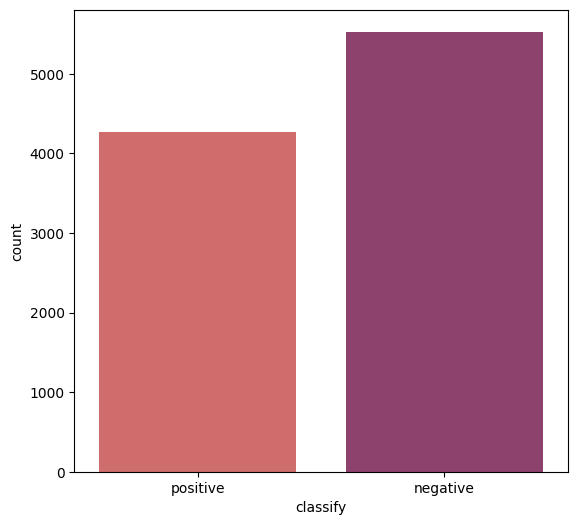

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.countplot(x='classify', data=df,palette="flare")
plt.show()

<ipython-input-20-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


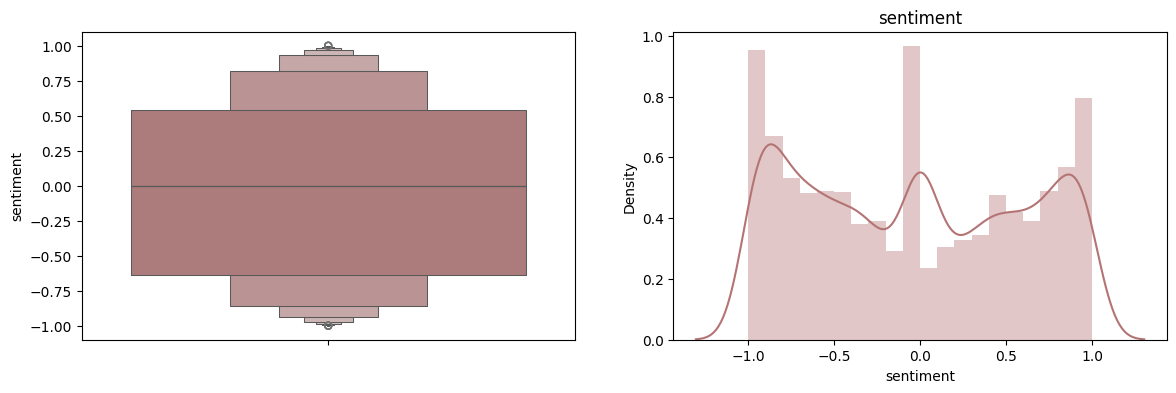

In [ ]:
def plots(plot):
    plt.figure(figsize=(14, 6)).set_figheight(4)
    plt.subplot(1,2,1)
    sns.boxenplot(df[plot],color ="#b47474")
    plt.subplot(1,2,2)
    sns.distplot(df[plot], bins=20,color ="#b47474")
    plt.title(plot)
    plt.show()
plots("sentiment")

<ipython-input-20-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


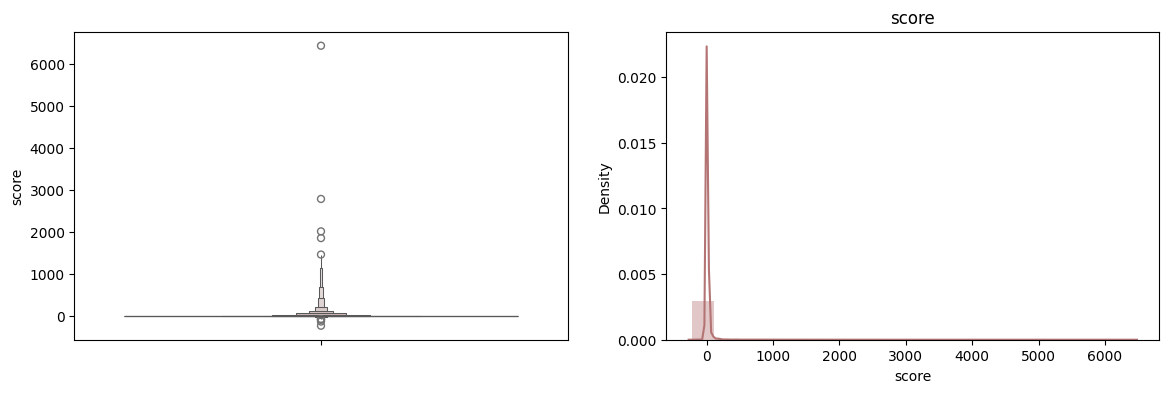

In [ ]:
plots("score")

<ipython-input-20-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


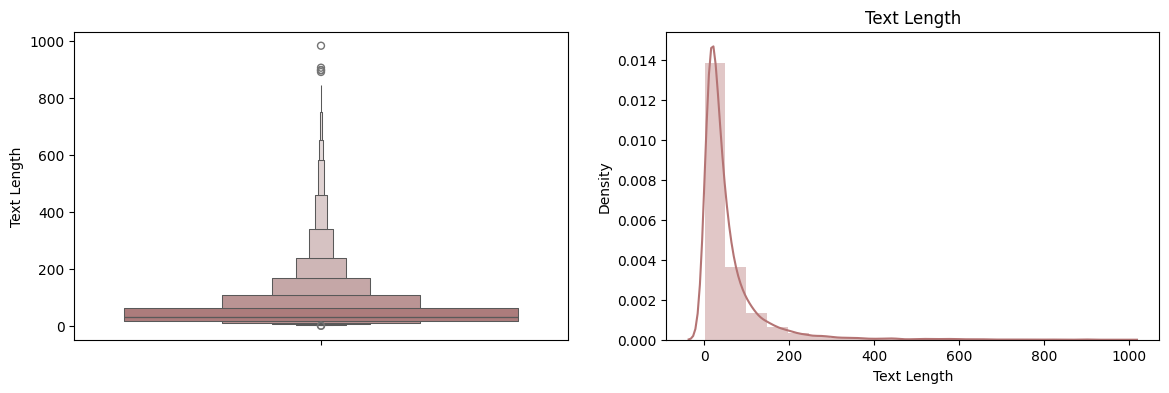

In [ ]:
plots("Text Length")

<Axes: >

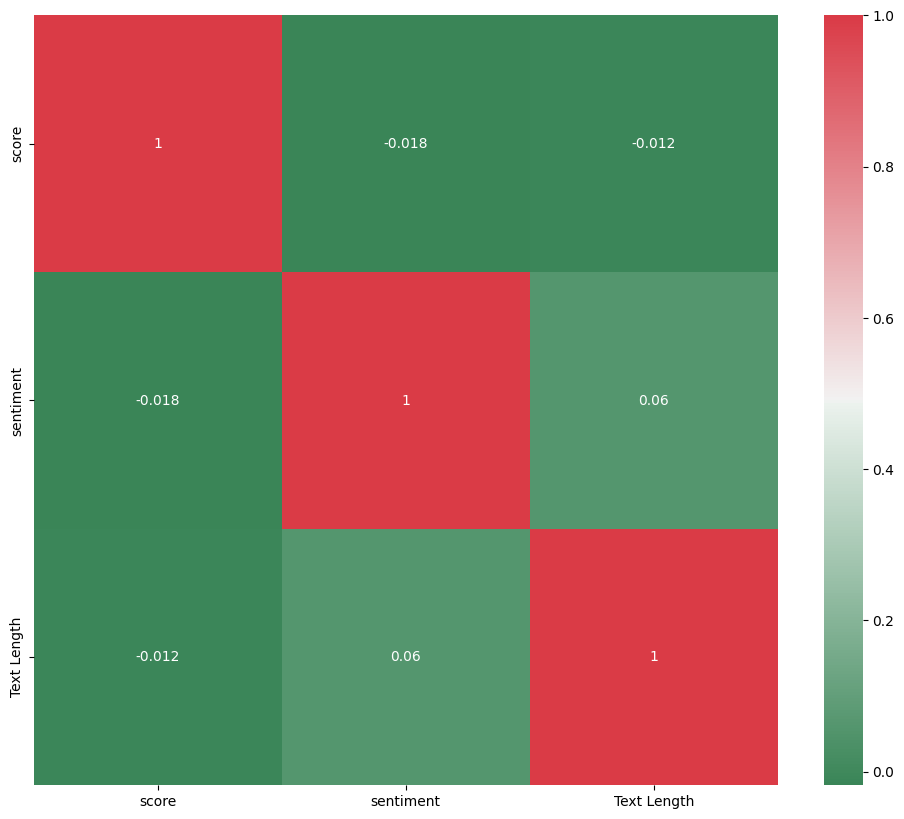

In [ ]:
df1 = df[["score", "sentiment", "Text Length"]]
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df1.corr(), cmap=cmap, annot=True)

**Most frequently repeated words in lematized_tokens**

In [ ]:
#Convert lists of tokens into a single list containing all tokens.
from collections import Counter
import itertools

# Combine all lemmatized tokens into a single list
all_tokens = list(itertools.chain.from_iterable(df['lemmatized_tokens']))


In [ ]:
unique_word = set(all_tokens)
len(unique_word)

36876

**Count Word Frequencies**

In [ ]:
# Count the frequency of each word
word_counts = Counter(all_tokens)

# Display word counts
print("Word Counts:")
print(word_counts)

Word Counts:
Counter({'change': 12115, 'climate': 11216, 'people': 4798, 'like': 3321, 'year': 2797, 'dont': 2794, 'would': 2683, 'one': 2301, 'think': 2241, 'thing': 2196, 'get': 2166, 'make': 1933, 'even': 1917, 'time': 1899, 'world': 1894, 'need': 1794, 'going': 1779, 'much': 1683, 'way': 1582, 'also': 1552, 'right': 1467, 'know': 1457, 'want': 1429, 'Climate': 1402, 'country': 1373, 'still': 1300, 'say': 1294, 'problem': 1287, 'could': 1264, 'issue': 1249, 'see': 1210, 'u': 1197, 'water': 1193, 'gt': 1190, 'really': 1154, 'energy': 1149, 'go': 1129, 'many': 1126, 'good': 1115, 'take': 1102, 'point': 1093, 'human': 1063, 'mean': 1063, 'isnt': 1062, 'life': 1033, 'doesnt': 1032, 'lot': 1029, 'global': 981, 'government': 971, 'well': 969, 'something': 969, 'real': 954, 'US': 904, 'said': 904, 'power': 902, 'actually': 889, 'work': 885, 'day': 883, 'cant': 869, 'thats': 861, 'better': 858, 'every': 848, 'come': 820, 'state': 803, 'le': 802, 'new': 802, 'believe': 778, 'already': 777, '

**Find Most Frequent Words**

In [ ]:
# Find the most common words
most_common_words = word_counts.most_common(30)

# Display the most common words
print("Most Common Words:")
print(most_common_words)

Most Common Words:
[('change', 12115), ('climate', 11216), ('people', 4798), ('like', 3321), ('year', 2797), ('dont', 2794), ('would', 2683), ('one', 2301), ('think', 2241), ('thing', 2196), ('get', 2166), ('make', 1933), ('even', 1917), ('time', 1899), ('world', 1894), ('need', 1794), ('going', 1779), ('much', 1683), ('way', 1582), ('also', 1552), ('right', 1467), ('know', 1457), ('want', 1429), ('Climate', 1402), ('country', 1373), ('still', 1300), ('say', 1294), ('problem', 1287), ('could', 1264), ('issue', 1249)]


In [ ]:
# Convert the most common words into a DataFrame
df_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print("Most Common Words DataFrame:")
print(df_common_words)

Most Common Words DataFrame:
       Word  Frequency
0    change      12115
1   climate      11216
2    people       4798
3      like       3321
4      year       2797
5      dont       2794
6     would       2683
7       one       2301
8     think       2241
9     thing       2196
10      get       2166
11     make       1933
12     even       1917
13     time       1899
14    world       1894
15     need       1794
16    going       1779
17     much       1683
18      way       1582
19     also       1552
20    right       1467
21     know       1457
22     want       1429
23  Climate       1402
24  country       1373
25    still       1300
26      say       1294
27  problem       1287
28    could       1264
29    issue       1249


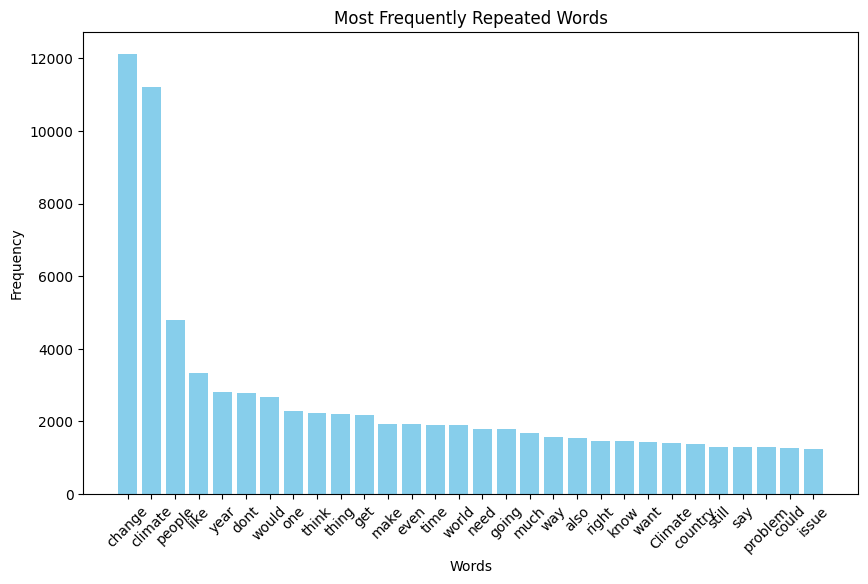

In [ ]:
import matplotlib.pyplot as plt

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.bar(df_common_words['Word'], df_common_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequently Repeated Words')
plt.xticks(rotation=45)
plt.show()

**Implementing TF-IDF for lemmatized_tokens**

We transform the lemmatized_tokens column into a format (numbers) suitable for machine learning models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['label'] = df['sentiment'].apply(lambda x: 1 if x > 0 else 0)
# 1 pos
# 0 neg
# Combine lemmatized tokens into strings
df['text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

print("DataFrame with Text Column:")
print(df[['lemmatized_tokens', 'label']])

DataFrame with Text Column:
                                      lemmatized_tokens  label
0     [Yeah, commenter, saying, base, doesnt, want, ...      1
1     [comparison, efficiency, solar, fossil, fuel, ...      0
2     [honestly, waiting, climate, change, impact, k...      0
3     [Sacramento, actually, happening, world, Clima...      0
4     [think, climate, change, tends, get, people, r...      1
...                                                 ...    ...
9994  [superior, didnt, think, fool, age, educated, ...      1
9995  [Looking, one, good, tree, ignoring, forest, P...      1
9996                           [tell, different, story]      0
9998  [Top, scientist, reported, UN, decade, ago, li...      1
9999  [Use, search, feature, question, asked, daily,...      0

[9803 rows x 2 columns]


In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_matrix.shape

(9803, 31227)

<Axes: >

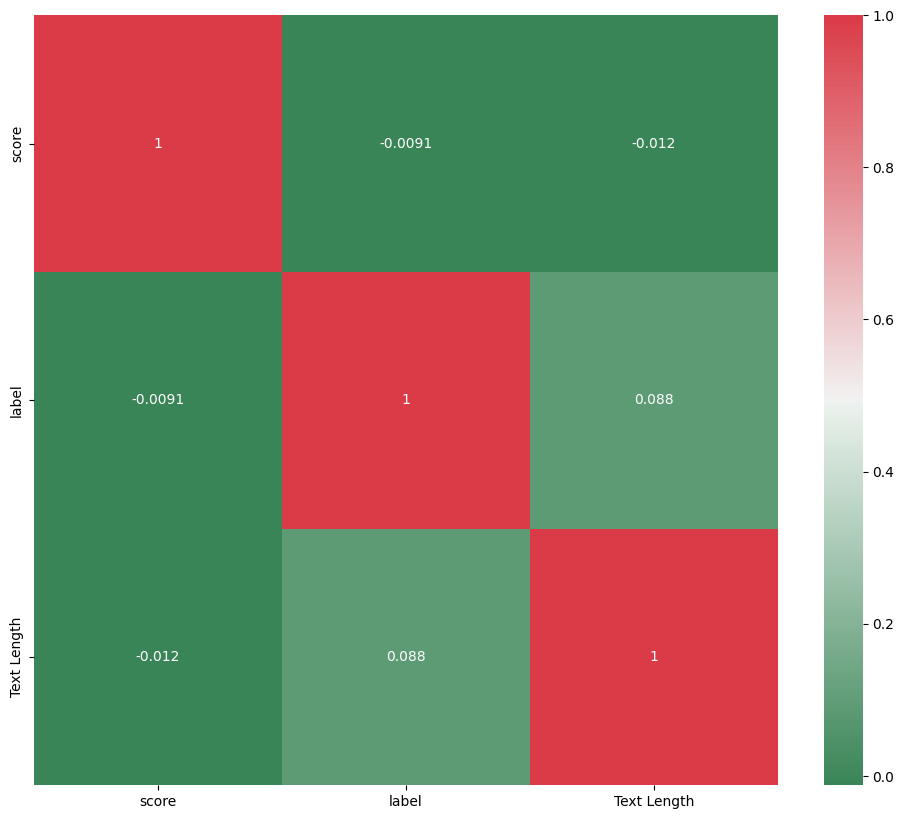

In [ ]:
df1 = df[["score", "label", "Text Length"]]
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df1.corr(), cmap=cmap, annot=True)

# **Build Model**

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 0.7730749617542071
Confusion Matrix:
 [[957 120]
 [325 559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81      1077
           1       0.82      0.63      0.72       884

    accuracy                           0.77      1961
   macro avg       0.78      0.76      0.76      1961
weighted avg       0.78      0.77      0.77      1961



 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.7751147373788884
Confusion Matrix:
 [[964 113]
 [328 556]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.81      1077
           1       0.83      0.63      0.72       884

    accuracy                           0.78      1961
   macro avg       0.79      0.76      0.76      1961
weighted avg       0.78      0.78      0.77      1961



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.7353391126976032
Confusion Matrix:
 [[936 141]
 [378 506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78      1077
           1       0.78      0.57      0.66       884

    accuracy                           0.74      1961
   macro avg       0.75      0.72      0.72      1961
weighted avg       0.74      0.74      0.73      1961



knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the knn model
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = rf_model.predict(X_test)

# Evaluation
print("knn")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


knn
Accuracy: 0.7353391126976032
Confusion Matrix:
 [[936 141]
 [378 506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78      1077
           1       0.78      0.57      0.66       884

    accuracy                           0.74      1961
   macro avg       0.75      0.72      0.72      1961
weighted avg       0.74      0.74      0.73      1961



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.5925548189699134
Confusion Matrix:
 [[788 289]
 [510 374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.66      1077
           1       0.56      0.42      0.48       884

    accuracy                           0.59      1961
   macro avg       0.59      0.58      0.57      1961
weighted avg       0.59      0.59      0.58      1961



Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:07:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.7470678225395206
Confusion Matrix:
 [[896 181]
 [315 569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1077
           1       0.76      0.64      0.70       884

    accuracy                           0.75      1961
   macro avg       0.75      0.74      0.74      1961
weighted avg       0.75      0.75      0.74      1961



# **LSTM**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# Text processing
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_body'])
sequences = tokenizer.texts_to_sequences(df['cleaned_body'])
padded_sequences = pad_sequences(sequences, maxlen=100)


scaler = MinMaxScaler(feature_range=(0, 1))
padded_sequences_scaled = scaler.fit_transform(padded_sequences)


# Split the data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(padded_sequences_scaled, df['label'], test_size=0.2, random_state=42)

# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=10))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='tanh'))  # Using 'tanh' for sentiment

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_lstm)
X_test_pca = pca.transform(X_test_lstm)
# Train the model
lstm_model.fit(X_train_pca, y_train_lstm, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_pca)
print(y_pred_lstm)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
442/442 - 70s - 159ms/step - accuracy: 0.5526 - loss: 0.2492 - val_accuracy: 0.5516 - val_loss: 0.2481
Epoch 2/10
442/442 - 81s - 184ms/step - accuracy: 0.5682 - loss: 0.2466 - val_accuracy: 0.5516 - val_loss: 0.2474
Epoch 3/10
442/442 - 80s - 181ms/step - accuracy: 0.5691 - loss: 0.2465 - val_accuracy: 0.5516 - val_loss: 0.2483
Epoch 4/10
442/442 - 83s - 189ms/step - accuracy: 0.5640 - loss: 0.2460 - val_accuracy: 0.5516 - val_loss: 0.2482
Epoch 5/10
442/442 - 61s - 139ms/step - accuracy: 0.5687 - loss: 0.2463 - val_accuracy: 0.5516 - val_loss: 0.2477
Epoch 6/10
442/442 - 81s - 183ms/step - accuracy: 0.5647 - loss: 0.2462 - val_accuracy: 0.5516 - val_loss: 0.2487
Epoch 7/10
442/442 - 82s - 185ms/step - accuracy: 0.5695 - loss: 0.2460 - val_accuracy: 0.5516 - val_loss: 0.2488
Epoch 8/10
442/442 - 82s - 185ms/step - accuracy: 0.5692 - loss: 0.2457 - val_accuracy: 0.5516 - val_loss: 0.2489
Epoch 9/10
442/442 - 82s - 185ms/step - accuracy: 0.5695 - loss: 0.2459 - val_accuracy: 

In [ ]:
# Evaluation
y_pred_lstm_classes = [1 if x > 0 else 0 for x in y_pred_lstm]
print("LSTM Neural Network")
print("Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_lstm, y_pred_lstm_classes))
print("Classification Report:\n", classification_report(y_test_lstm, y_pred_lstm_classes))

LSTM Neural Network
Accuracy: 0.450790413054564
Confusion Matrix:
 [[   0 1077]
 [   0  884]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1077
           1       0.45      1.00      0.62       884

    accuracy                           0.45      1961
   macro avg       0.23      0.50      0.31      1961
weighted avg       0.20      0.45      0.28      1961



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# **improve SVC**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train_pca, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_pca)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Evaluation
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.7465578786333503
Confusion Matrix:
 [[897 180]
 [317 567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1077
           1       0.76      0.64      0.70       884

    accuracy                           0.75      1961
   macro avg       0.75      0.74      0.74      1961
weighted avg       0.75      0.75      0.74      1961



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto'],
    'kernel': ['linear','rbf'],
    'degree': [2,3]  # Only relevant for the 'poly' kernel
}

# Grid search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.4f}")

# Train the SVC model with the best hyperparameters
svc_best = SVC(
    C=best_params['C'],
    gamma=best_params['gamma'],
    kernel=best_params['kernel'],
    degree=best_params['degree'],
    random_state=42
)

svc_best.fit(X_train_pca, y_train)

# Predictions
y_pred = svc_best.predict(X_test_pca)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.7382


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Support Vector Machine with PCA and Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Support Vector Machine with PCA and Hyperparameter Tuning
Accuracy: 0.7466
Confusion Matrix:
 [[897 180]
 [317 567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1077
           1       0.76      0.64      0.70       884

    accuracy                           0.75      1961
   macro avg       0.75      0.74      0.74      1961
weighted avg       0.75      0.75      0.74      1961



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'saga' supports both l1 and l2
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-validation Accuracy: 0.7759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Example: Using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)  # Reduce to 100 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression with PCA features
log_reg_pca = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}")


# **pipeline**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib
import pickle

# Custom Transformer for Cleaning Text
class CleanText(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._clean_text)

    def _clean_text(self, text):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        return text

# Custom Transformer for Tokenization
class TokenizeText(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._tokenize_text)

    def _tokenize_text(self, text):
        return word_tokenize(text)

# Custom Transformer for Filtering Tokens
class FilterTokens(BaseEstimator, TransformerMixin):
    def __init__(self, stop_words=None, min_length=2):
        self.stop_words = stop_words if stop_words is not None else set(stopwords.words('english'))
        self.min_length = min_length

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._filter_tokens)

    def _filter_tokens(self, tokens):
        return [token for token in tokens if token not in self.stop_words and len(token) >= self.min_length]

# Custom Transformer for Lemmatization
class LemmatizeTokens(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self._lemmatize_tokens)

    def _lemmatize_tokens(self, tokens):
        return [self.lemmatizer.lemmatize(token) for token in tokens]


pipeline = Pipeline([
    ('clean_text', CleanText()),
    ('tokenize_text', TokenizeText()),
    ('filter_tokens', FilterTokens()),
    ('lemmatize_tokens', LemmatizeTokens()),
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),  # Use identity preprocessor/tokenizer
    ('svc', SVC(kernel='rbf', C=1, gamma='scale', random_state=42))
])